# Lending Club Case Study

## Objective
#### This company is the largest online loan marketplace, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

#### In this case study, we would use Exploratory Data Analysis to understand how consumer attributes and loan attributes influence the tendency of default.


### Importing all the required modules for EDA Analysis

In [1]:
## Import the libraries which would be used in the EDA Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## STEP 1 - Data Understanding And Data Cleaning
#### In this section, we would import Loan  CSV file and try to understand the data variables.


#### We would check the fields with high percentage missing values/Null Values and would drop them. Also, we would treat the Invalid values/Junk values.

#### Lastly, we would standardize the values by mapping them to more consistent and intuitive units.

In [2]:
# Loading the Loan.csv dataset.

loan=pd.read_csv("loan.csv")
loan.shape

(39717, 111)

In [3]:
## Adding this code to scroll through the entire data 

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
loan.columns.to_frame()

,0
id,id
member_id,member_id
loan_amnt,loan_amnt
funded_amnt,funded_amnt
funded_amnt_inv,funded_amnt_inv
term,term
int_rate,int_rate
installment,installment
grade,grade
sub_grade,sub_grade


In [5]:
#Exploring the records in the loan dataset for understanding the data values.

loan.sample(10)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
36316,415094,482290,4000,4000,4000.0,36 months,7.68%,124.77,A,A2,Dauntless Corporation,< 1 year,MORTGAGE,103240.0,Not Verified,Jun-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I am a 30-something male looking to make the p...,home_improvement,Remodeling Condo,220xx,VA,0.87,0,May-97,3,NaN,NaN,8,0,5220,12.70%,24,f,0.0,0.0,4042.440000,4042.44,4000.0,42.44,0.0,0.0,0.0,Aug-09,2618.20,NaN,Aug-09,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
23325,615553,789351,8000,4875,4875.0,36 months,6.17%,148.69,A,A3,JP MORGAN CHASE,1 year,RENT,35000.0,Source Verified,Nov-10,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 11/16/10 > I recently move...,debt_consolidation,DEBT,104xx,NY,7.20,0,Oct-01,2,NaN,NaN,6,0,6610,52.90%,21,f,0.0,0.0,5352.979287,5352.98,4875.0,477.98,0.0,0.0,0.0,Dec-13,153.35,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
21084,648006,829039,6125,6125,6100.0,36 months,6.17%,186.81,A,A3,"Weissman Nowack Curry & Wilco, PC",10+ years,MORTGAGE,60000.0,Not Verified,Jan-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 01/06/11 > Funds will pay ...,credit_card,Chase Credit Card Payoff,300xx,GA,12.92,0,Jul-00,0,NaN,NaN,8,0,6475,32.20%,18,f,0.0,0.0,6679.488143,6652.22,6125.0,554.49,0.0,0.0,0.0,Sep-13,687.46,NaN,Mar-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
19549,673814,861251,12000,12000,11975.0,36 months,7.29%,372.12,A,A4,Waffle House,4 years,MORTGAGE,50000.0,Not Verified,Feb-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation,300xx,GA,3.10,0,Jul-04,0,NaN,NaN,5,0,4283,22.20%,7,f,0.0,0.0,13396.253660,13368.34,12000.0,1396.25,0.0,0.0,0.0,Mar-14,399.58,NaN,May-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# Checking the data types of the columns and if any null values present in them.

loan.info()
loan.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


id                                    0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
delinq_2yrs                           0
total_pymnt                           0
total_rec_int                         0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0
last_pymnt_amnt                       0
policy_code                           0
application_type                      0
acc_now_delinq                        0
delinq_amnt                           0
total_pymnt_inv                       0
dti                                   0
total_rec_prncp                       0
zip_code                              0


In [7]:
## Checking the missing value percentage in each column

round((loan.isnull().sum()/len(loan))*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
# User defined function to perform data cleaning process.

def data_clean(data):
    
     ## Get the list of columns which dont contain more than 90% of data and drop those columns
    emptycol=list(data.columns[loan.isnull().mean() > 0.6])
    data.drop(emptycol,axis=1, inplace=True)
    data.drop(['desc','pymnt_plan','policy_code','application_type','initial_list_status',
                'delinq_2yrs','revol_bal','inq_last_6mths','out_prncp',
               'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
                'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
               'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
                'collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt', 'title','pub_rec_bankruptcies'],axis=1, inplace=True)
     ##drop rows with missing data 
    data.dropna(subset=['emp_title','emp_length','revol_util'],inplace=True)
    
    ## fixing the data for junnk/invalid values
    data.term=data.term.apply(lambda x:str(x)[:3])
    data.int_rate=data.int_rate.apply(lambda x: x.replace('%',''))
    data.revol_util=data.revol_util.apply(lambda x: x.replace('%',''))
  
    
    ## convert data type to appropriate data type.
    data.term=data.term.astype('int32')
    data.int_rate=data.int_rate.astype('float64')
    data.revol_util=data.revol_util.astype('float64')

In [9]:
#Function call to perform Data claening Process.

data_clean(loan)

In [10]:
## Check the % of data retains after cleaning
print(len(loan)/39717)

round((loan.isnull().sum()/len(loan))*100,2)

0.9355187954780069


id                     0.00
member_id              0.00
loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
url                    0.00
purpose                0.00
zip_code               0.00
addr_state             0.00
dti                    0.00
earliest_cr_line       0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.00
total_acc              0.00
acc_now_delinq         0.00
tax_liens              0.09
dtype: float64

In [11]:
# Cheking the records after performing data cleaning step.
loan.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,acc_now_delinq,tax_liens
26563,567207,729703,3000,3000,3000.00000,36,11.86,99.45,B,B5,Hancock County Schools,10+ years,MORTGAGE,27600.00,Not Verified,Aug-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,260xx,WV,18.04,Oct-98,9,1,79.7,20,0,0.0
39194,254979,254956,10000,10000,2700.00000,36,8.00,313.37,A,A3,Kaitlin's Heart Foundation,2 years,MORTGAGE,25000.00,Not Verified,Feb-08,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,486xx,MI,12.14,Jul-86,3,0,9.2,13,0,0.0
24307,601579,771925,3275,3275,3275.00000,36,8.88,103.97,B,B1,DeVry University,< 1 year,RENT,35820.00,Verified,Oct-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,600xx,IL,10.02,Oct-05,5,0,29.7,7,0,0.0
38875,308236,308233,20000,5775,4035.26000,36,12.29,192.62,C,C5,NYSDOT,4 years,MORTGAGE,97200.00,Not Verified,Apr-08,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,142xx,NY,19.70,Oct-95,13,0,46.7,27,0,0.0
27337,555021,714845,15000,15000,13859.60505,36,7.88,469.22,A,A5,Skinit Inc,5 years,OWN,91000.00,Source Verified,Jul-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,920xx,CA,16.80,Jan-97,6,0,68.5,20,0,0.0
30643,505111,650735,25000,25000,22165.98811,36,16.45,884.44,E,E1,Omni Orthopaedics,10+ years,MORTGAGE,73163.68,Verified,Apr-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,446xx,OH,17.94,Jan-96,6,1,0.0,29,0,0.0
13094,787304,990828,2000,2000,2000.00000,36,12.99,67.38,C,C1,HD Truck & Tractor,7 years,RENT,26000.00,Not Verified,Jun-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,706xx,LA,17.35,Mar-06,16,0,44.6,18,0,0.0
19637,671941,858951,8000,8000,8000.00000,36,14.91,276.98,D,D2,Veteran's Healthcare Administration,10+ years,MORTGAGE,99085.00,Verified,Feb-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,891xx,NV,10.72,Feb-91,14,0,63.1,48,0,0.0
22437,629059,805991,1500,1500,1500.00000,36,10.36,48.66,B,B5,Harvard Hot Dog,7 years,RENT,45000.00,Source Verified,Dec-10,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,021xx,MA,18.16,Aug-04,8,0,84.3,27,0,0.0
24751,596308,765509,7000,7000,7000.00000,36,15.95,245.93,D,D4,AVX Corporation,5 years,MORTGAGE,70000.00,Source Verified,Oct-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,295xx,SC,17.71,Dec-98,4,1,72.2,16,0,0.0


In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37156 entries, 1 to 39716
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37156 non-null  int64  
 1   member_id            37156 non-null  int64  
 2   loan_amnt            37156 non-null  int64  
 3   funded_amnt          37156 non-null  int64  
 4   funded_amnt_inv      37156 non-null  float64
 5   term                 37156 non-null  int32  
 6   int_rate             37156 non-null  float64
 7   installment          37156 non-null  float64
 8   grade                37156 non-null  object 
 9   sub_grade            37156 non-null  object 
 10  emp_title            37156 non-null  object 
 11  emp_length           37156 non-null  object 
 12  home_ownership       37156 non-null  object 
 13  annual_inc           37156 non-null  float64
 14  verification_status  37156 non-null  object 
 15  issue_d              37156 non-null 

In [13]:
## User Defined Function for standardizing and mapping discrete variables.

def data_std(data):
    emplen = {'< 1 year':1, 
      '10+ years':10, 
      '1 year':1, 
      '3 years':3, 
      '8 years':8,
      '9 years':9,
      '5 years':5,
      '4 years':4,
      '6 years':6,
      '2 years':2,
      '7 years':7}
    verified={'Not Verified':"High Risk", 'Source Verified':"Low Risk", 'Verified':"No Risk"}
    loanstatus={'Charged Off':1, 'Current':2, 'Fully Paid':0}
    
    #replacing
    data.replace(dict(emp_length=emplen,                      
                      verification_status=verified,
                      loan_status=loanstatus
                     ), inplace=True)
    
    data.issue_d=pd.to_datetime(data.issue_d.str.upper(), format='%b-%y', yearfirst=False)
    
    ## split year and month of loan issued.
    data['issued_y']=data.issue_d.dt.year    
    data['issued_m']=data.issue_d.dt.month
    season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',5:'Summer',
          6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall',11:'Winter',12:'Winter'}
    data['issued_s']=data.issued_m.map(season)
    
    grade_code={'A': 'A Least Risk', 'B':'B Low Risk', 'C':'C & D Medium Risk', 'D':'C & D Medium Risk','E': 'E & F High Risk','F':'E & F High Risk','G':'G Very High Risk'}
    
    data.replace(dict(grade=grade_code),inplace=True)

In [14]:
#Function call to standardize dataset.

data_std(loan)

In [15]:
## check if the id is unique identifier
len(loan)==loan.id.value_counts().sum()

True

In [16]:
loan.isnull().sum().sum()

32

In [17]:
# Dropping the records corresponding to "Current" Loan status.

loan.drop( loan[ loan.loan_status == 2 ].index , inplace=True)


In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36090 entries, 1 to 39716
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   36090 non-null  int64         
 1   member_id            36090 non-null  int64         
 2   loan_amnt            36090 non-null  int64         
 3   funded_amnt          36090 non-null  int64         
 4   funded_amnt_inv      36090 non-null  float64       
 5   term                 36090 non-null  int32         
 6   int_rate             36090 non-null  float64       
 7   installment          36090 non-null  float64       
 8   grade                36090 non-null  object        
 9   sub_grade            36090 non-null  object        
 10  emp_title            36090 non-null  object        
 11  emp_length           36090 non-null  int64         
 12  home_ownership       36090 non-null  object        
 13  annual_inc           36090 non-

### We would be analyzing various important variables and their distribution to check if any outliers exist.

In [19]:
# Statistically analyzing the data distribution of Interest Rate, Funded Amount by investors, derogatory public records , open credit lines and Annual Income of borrowers.

print("Interest Rate Distribution","\n" ,loan['int_rate'].describe())
print("\n")
print("The total amount committed by investors for that loan at that point in time.","\n" ,loan['funded_amnt_inv'].describe())
print("\n")
print("Number of derogatory public records","\n" ,loan['pub_rec'].describe())
print("\n")
print("The number of open credit lines in the borrower's credit file.","\n" ,loan['open_acc'].describe())
print("\n")
print("The self-reported annual income provided by the borrower during registration.","\n" ,loan['annual_inc'].describe())
print("\n")

Interest Rate Distribution 
 count    36090.000000
mean        11.964021
std          3.683625
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64


The total amount committed by investors for that loan at that point in time. 
 count    36090.000000
mean     10275.355521
std       6992.915581
min          0.000000
25%       5000.000000
50%       8895.525421
75%      14025.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


Number of derogatory public records 
 count    36090.000000
mean         0.053838
std          0.235081
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


The number of open credit lines in the borrower's credit file. 
 count    36090.000000
mean         9.330147
std          4.393421
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
ma

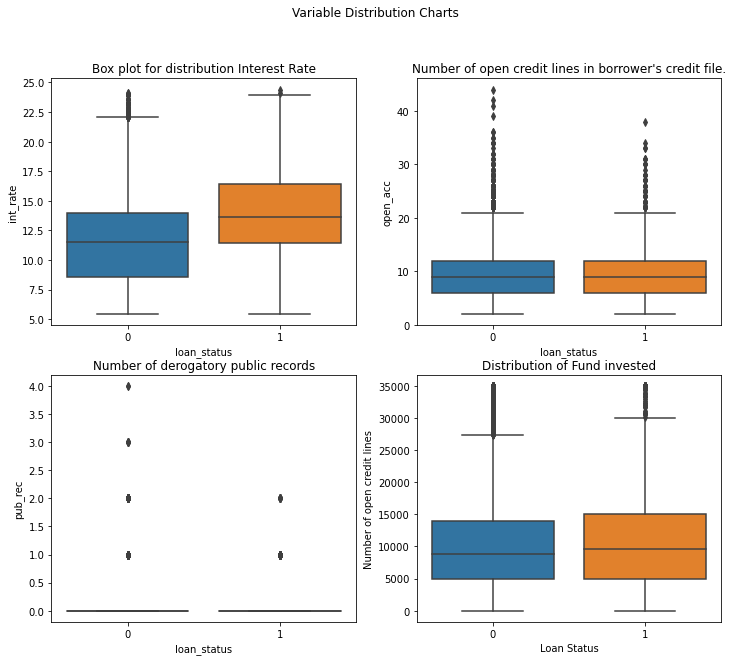

In [20]:
# Plotting Boxplot to identify extreme values and statistical data distribution.

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Variable Distribution Charts')

sns.boxplot(loan.loan_status,loan['int_rate'], orient='v', ax=axes[0,0]).set_title("Box plot for distribution Interest Rate")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")

sns.boxplot(loan.loan_status,loan['funded_amnt_inv'], orient='v',ax=axes[1,1]).set_title("Distribution of Fund invested")
plt.xlabel("Loan Status")
plt.ylabel("Funded Amount by Investors")


sns.boxplot(loan.loan_status,loan['pub_rec'],orient='v', ax=axes[1,0]).set_title("Number of derogatory public records")
plt.xlabel("Loan Status")
plt.ylabel("Number of derogatory public records")


sns.boxplot(loan.loan_status,loan['open_acc'], orient='v',ax=axes[0,1]).set_title("Number of open credit lines in borrower's credit file.")
plt.xlabel("Loan Status")
plt.ylabel("Number of open credit lines")

plt.show()

* Based on the above distibution analysis, we could say that there are no significantly extreme low or high values which can over-estimate or under-estimate the results.

## STEP 2 - Performing Univariate Analysis

#### This type of analysis deals with analyzing variables one at a time.
#### It is important to spearately understand each variable before analyzing multiple variables together and understand their impact on each other.

#### In this section we would perform both - Univariate Analysis and Segmented Univariate Analysis.


### We have plotted below the Distibution Plots which would help us to reveal interesting insights about the data patterns and frequencies. 

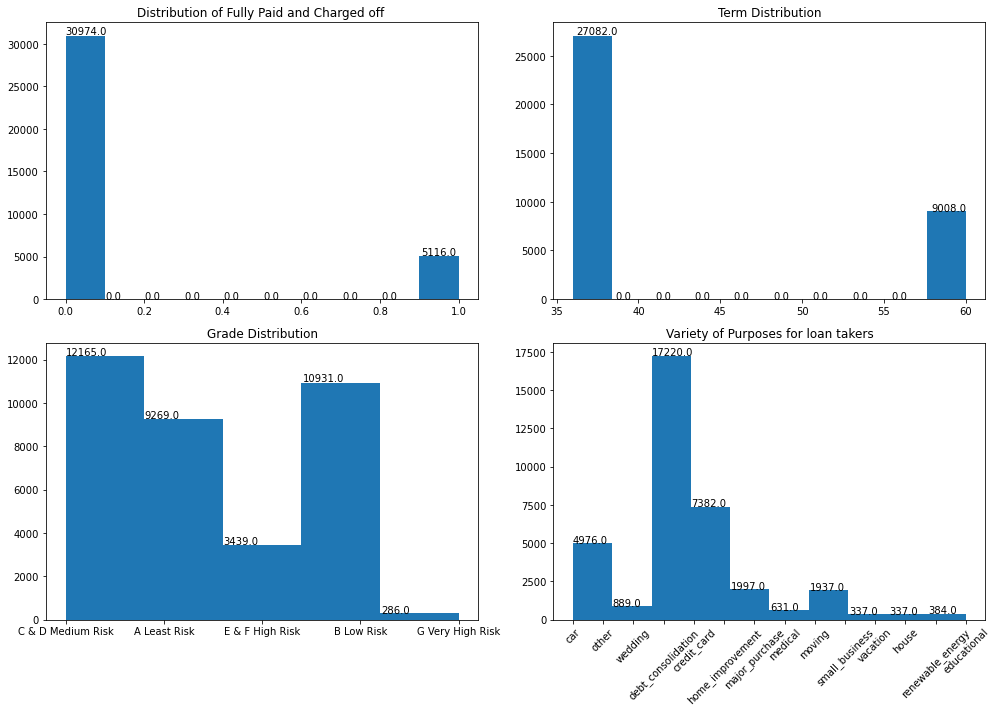

In [21]:
# Frequency distribution of Important data variables for Loan approvals.

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(loan.loan_status)
ax0.set_title('Distribution of Fully Paid and Charged off ')
for p in ax0.patches:
    ax0.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

ax1.hist(loan.term)
ax1.set_title('Term Distribution')
for l in ax1.patches:
    ax1.annotate(str(l.get_height()), (l.get_x() * 1.005, l.get_height() * 1.005))


ax2.hist(loan.grade, bins=5)
ax2.set_title('Grade Distribution')
for m in ax2.patches:
    ax2.annotate(str(m.get_height()), (m.get_x() * 1.005, m.get_height() * 1.005))


# Make a multiple-histogram of data-sets with different length.
ax3.hist(loan.purpose)
ax3.set_title('Variety of Purposes for loan takers')
plt.xticks(rotation=45)
fig.tight_layout()
for n in ax3.patches:
    ax3.annotate(str(n.get_height()), (n.get_x() * 1.005, n.get_height() * 1.005))
plt.show()

* #### From above Figure 1(0,0): We can see that around 14% i.e. 5131 people are defaulters in total 36136 records.
* #### From above Figure 2(0,1): We can see that around 75% i.e. 27125 people tends to choose a term of 36 months than 60 months.
* #### From above Figure 3(1,0): We can see that around 34% i.e. 12192 Loans were assigned either C Grade or D grade based on borrower's risk profile - Medium Risk.
* #### From above Figure 4(1,1): We can see that among the several type of Loan purposes, Loans taken for "Debit Consolidation, Credit Card, other, Home improvement" seems to be more.

### We have binned some important continuous variables below in order to map them into more consistent and intuitive ranges.

In [22]:
# Binning Amount funded by Investors into relevant classes.

bin1 = [0, 5000, 15000, 25000,35000]
classes = ['Low', 'Medium', 'High', 'Very high']
loan['loan_amnt_range'] = pd.cut(loan['funded_amnt_inv'], bin1, labels=classes)

In [23]:
# Binning Borrower's annual income into relevant classes.

bin3 = [0, 25000, 50000, 100000, 500000, 7500000]
classes3 = ['0-25000', '25000-50000', '50000-100000', '100000-500000', '500000+']
loan['reclass_annual_inc'] = pd.cut(loan['annual_inc'], bin3, labels=classes3)


In [24]:
# Binning Borrower's annual income into detailed classes to reveal finer trends.

bin5 = [0,10000, 20000, 30000, 40000, 50000, 60000,70000,80000,90000,100000,150000,200000,250000,300000,1000000,2000000,3000000,4000000,5000000,6000000,7000000]
classes5 = ['0-10k', '10k-20k','20k-30k', '30k-40k','40k-50k', '50k-60k','60k-70k','70k-80k','80k-90k','90k-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-1M','1M-2M','2M-3M','3M-4M','4M-5M','5M-6M','6M-7M']
loan['reclass_annual_inc_1'] = pd.cut(loan['annual_inc'], bin5, labels=classes5)

In [25]:
# Binning Interest Rates into relevant classes.

bin2 = [5, 10, 15, 20, 25]
classes2 = ['Low','Medium', 'High','Very high']
loan['reclass_int_rate'] = pd.cut(loan['int_rate'], bin2, labels=classes)

In [26]:
# Binning Debt to Income Ratio into relevant classes.

bin4 = [-1, 5.00, 10.00, 15.00,20.00,25.00,30.00,35.00]
classes4 = ['<5', '5-10', '10-15', '15-20','20-25','25-30','30-35']
loan['reclass_DTI'] = pd.cut(loan['dti'], bin4, labels=classes4)

In [27]:
# Binning Debt to revol_util into relevant classes.

bin6 = [0, 5.00, 10.00, 20.00,25.00,30.00,35.00,40.00,45.00,50.00,55.00,60.00,65.00,70.00,75.00,80.00,85.00,90.00,95.00,100]
classes6 = ['0-5%', '5-10%', '10-15%', '15-20%','20-25%','25-30%','30-35%','40-45%','45-50%','50-55%','55-60%','60-65%','65-70%','70-75%','75-80%','80-85%','85-90%','90-95%','95-100%']
loan['revol_util_range'] = pd.cut(loan['revol_util'], bin6, labels=classes6)

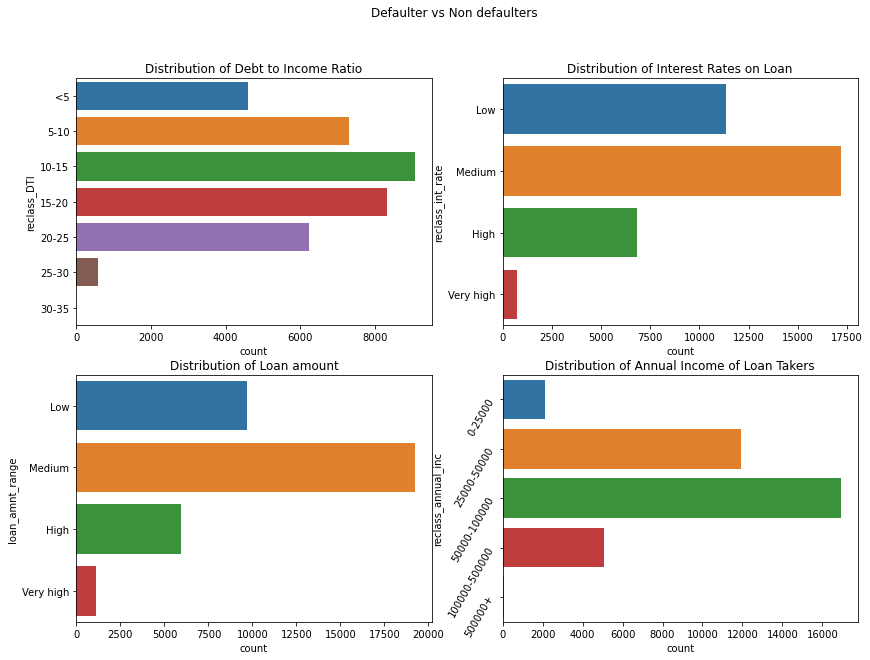

In [28]:
# Understanding the distribution of DTI, Annual Income of borrowers, Loan amount and Interest Rate.

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Defaulter vs Non defaulters')

sns.countplot(ax=axes[0,0],y=loan['reclass_DTI']).set_title("Distribution of Debt to Income Ratio")

sns.countplot(ax=axes[1,1],y=loan['reclass_annual_inc']).set_title("Distribution of Annual Income of Loan Takers")
plt.yticks(rotation=60)

sns.countplot(ax=axes[1,0],y=loan['loan_amnt_range']).set_title("Distribution of Loan amount")

sns.countplot(ax=axes[0,1],y=loan['reclass_int_rate']).set_title("Distribution of Interest Rates on Loan")

plt.show()


* #### From above Figure 1(0,0): We can see that maximum number of borrowers have Very High Debt to income ration i.e. between 15-35% which points to higher Tendency to Default.

* #### From above Figure 2(0,1): We can see that most loans were given at Medium Interest Rates i.e. 10%-15%.

* #### From above Figure 3(1,0): We can see that maximum number of loans given were in the range of  5K-10K.

* #### From above Figure 4(1,1): We can see that maximum number of borrowers hav salary range between 25K - 100K.

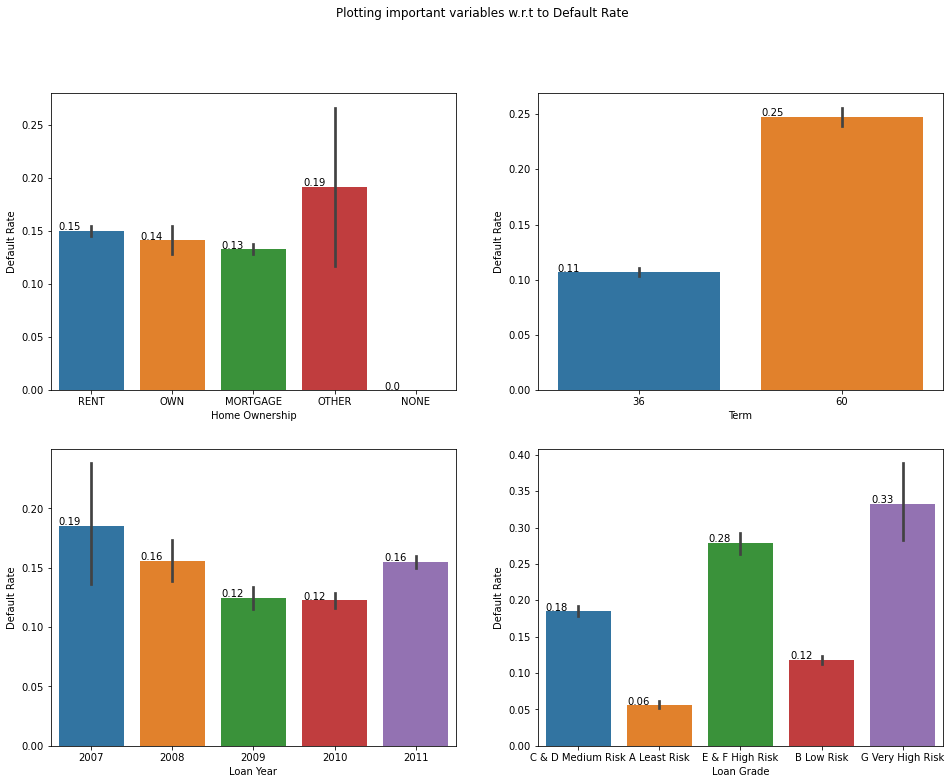

In [29]:
# Analyzing the below important variables w.r.t Default Rate.

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Plotting important variables w.r.t to Default Rate')

home_1=sns.barplot(ax=axes[0,0],data=loan,x=loan.home_ownership,y=loan.loan_status)
home_1.set(xlabel='Home Ownership', ylabel='Default Rate')
for h in home_1.patches:
    home_1.annotate(str(round(h.get_height(),2)), (h.get_x() * 1.005, h.get_height() * 1.005))

term_1=sns.barplot(ax=axes[0,1], data=loan,x=loan.term,y=loan.loan_status)
term_1.set(xlabel='Term', ylabel='Default Rate')
for t in term_1.patches:
    term_1.annotate(str(round(t.get_height(),2)), (t.get_x() * 1.005, t.get_height() * 1.005))

year_1=sns.barplot(ax=axes[1,0], data=loan,x=loan.issued_y,y=loan.loan_status)
year_1.set(xlabel='Loan Year', ylabel='Default Rate')
for y in year_1.patches:
    year_1.annotate(str(round(y.get_height(),2)), (y.get_x() * 1.005, y.get_height() * 1.005))
    
grade_1=sns.barplot(ax=axes[1,1], data=loan,x=loan.grade,y=loan.loan_status)
grade_1.set(xlabel='Loan Grade', ylabel='Default Rate')
for g in grade_1.patches:
    grade_1.annotate(str(round(g.get_height(),2)), (g.get_x() * 1.005, g.get_height() * 1.005))

plt.savefig("Univariate.png")
plt.show()


* #### From above Figure 1(0,0): We can see that **Undefined or None type Home ownership status** tends to have higher Default Rate.

* #### From above Figure 2(0,1): We can see that Laons borrowers choosing a **term of 60 months** tend to Defualt more.

* #### From above Figure 3(1,0): We can see that in the **year 2007 Default Rate was maximum** and then it reduced subsequently. However, we can see a rise again in the year 2011.

* #### From above Figure 4(1,1): We can see that Loans with **Grade - G type tends to Default most** followed by Grade type - E & F.

* #### From above Figure: We can see that among the several type of Loan purposes, Loans taken for "Debit Consolidation, Credit Card, other, Home improvement" seems to be more

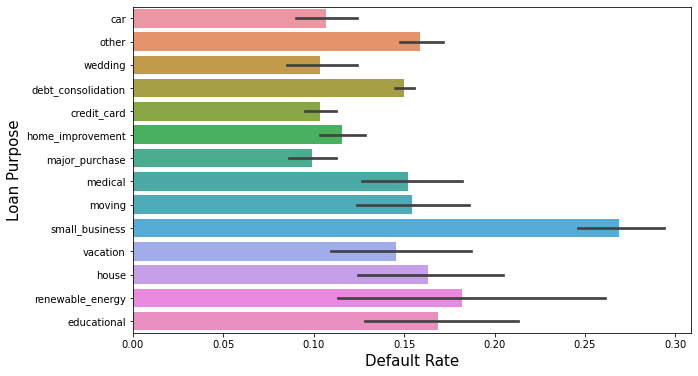

In [30]:
# Analyzing Loan Purpose w.r.t Default Rate

plt.figure(figsize=(10,6))
sns.barplot(data=loan,y=loan.purpose,x=loan.loan_status)
plt.xlabel("Default Rate", fontsize=15)
plt.ylabel("Loan Purpose", fontsize=15)
plt.savefig("Univariate2.png")
plt.show()

* #### From above Figure: We can see on Comparing loand count graph with the defaulter graph  "Small Businesses, Others, Debit Consolidation" are the purposes seems to have more defaulters

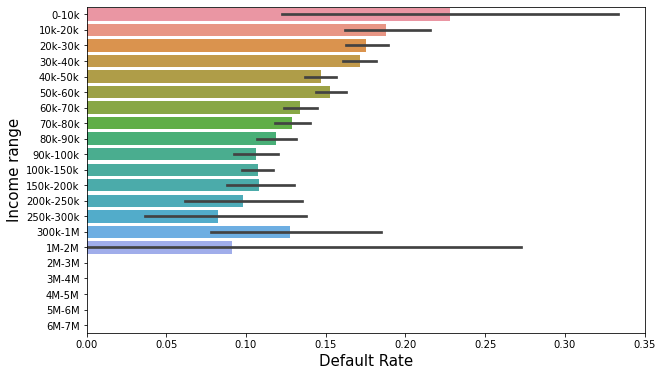

In [31]:
# Analyzing defaulter rate w.r.t Anual Income

plt.figure(figsize=(10,6))
sns.barplot(data=loan,y=loan.reclass_annual_inc_1,x=loan.loan_status)
plt.xlabel("Default Rate", fontsize=15)
plt.ylabel("Income range", fontsize=15)
plt.savefig("Univariate3.png")
plt.show()

* #### From above Figure: 
>* __We can see those who earn less than 10K seems to be 25% defaulters__
>* __We can see those who earn between 10K-20K seems to be 20% defaulters__

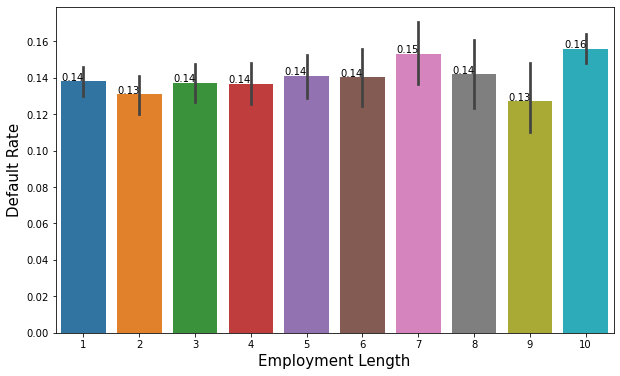

In [32]:
#Analyzing Emplyment Length w.r.t Default Rate.

plt.figure(figsize=(10,6))
emp=sns.barplot(data=loan,x=loan.emp_length,y=loan.loan_status)
plt.xlabel("Employment Length", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
for e in emp.patches:
    emp.annotate(str(round(e.get_height(),2)), (e.get_x() * 1.002, e.get_height() * 1.005))
plt.show()

* #### From above Figure: We can see that defaulters across the Employee length is in 0.01% difference. We can not identifiy the defaulters from here

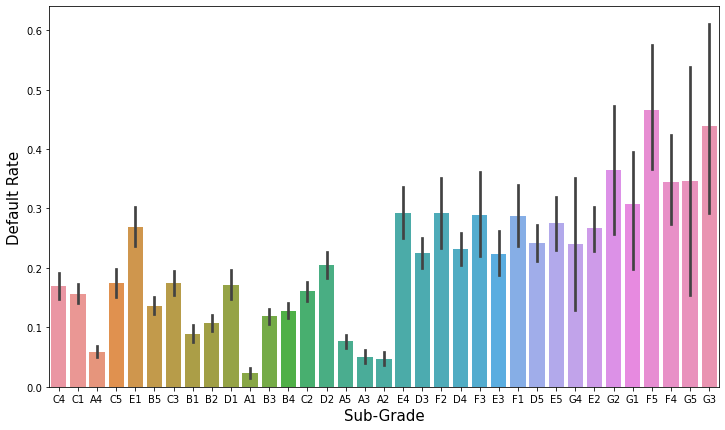

In [33]:
# Analyzing Sub-Grade w.r.t Default Rate

plt.figure(figsize=(12,7))
sns.barplot(data=loan,x=loan.sub_grade,y=loan.loan_status)
plt.xlabel("Sub-Grade", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
plt.show()

* #### From above Figure: We can notice that as we progress from Sub Grade A type to G-Type, the Tendency to Default increases.

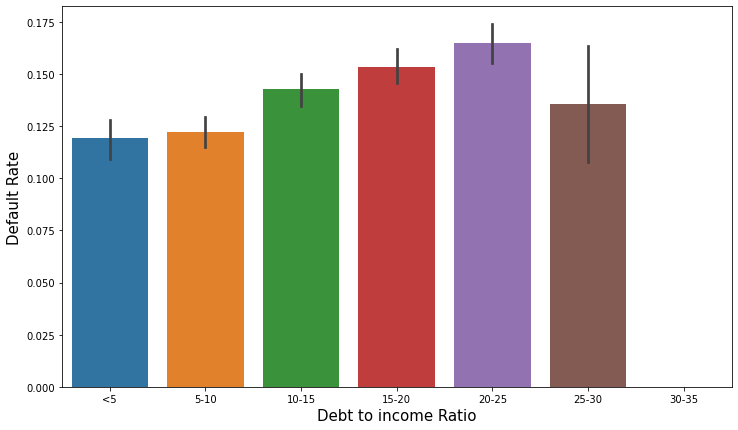

<Figure size 432x288 with 0 Axes>

In [34]:
# Analyzing DTI w.r.t Default Rate

plt.figure(figsize=(12,7))
sns.barplot(data=loan,x=loan.reclass_DTI,y=loan.loan_status)
plt.xlabel("Debt to income Ratio", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
plt.show()
plt.savefig("Univariate4.png")

* #### From above Figure: We can see that Default Rate usually increases with increasing DTI ratio.

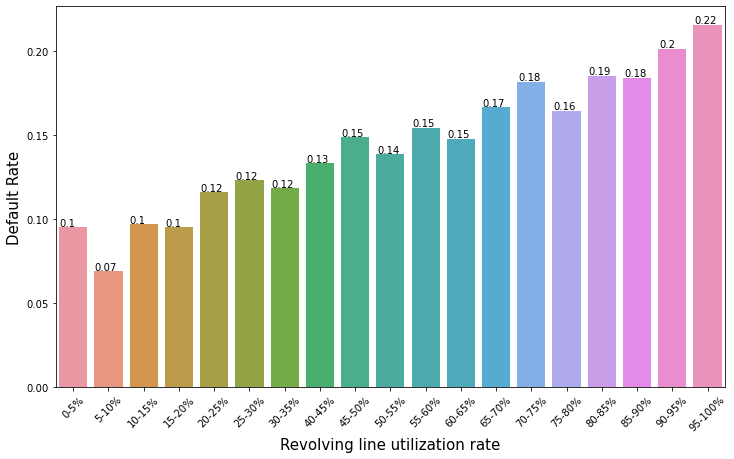

<Figure size 432x288 with 0 Axes>

In [35]:
# Analyzing Revolving Util w.r.t Default Rate

plt.figure(figsize=(12,7))
rev=sns.barplot(data=loan,x=loan.revol_util_range,y=loan.loan_status, ci=None)
plt.xlabel("Revolving line utilization rate", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
plt.xticks(rotation = 45) 
for e in rev.patches:
    rev.annotate(str(round(e.get_height(),2)), (e.get_x() * 1.002, e.get_height() * 1.005))
plt.show()
plt.savefig("Univariate5.png")

* #### From above Figure: We can see that Default Rate is around 20% for Revolving line utilization rate greater than 80%

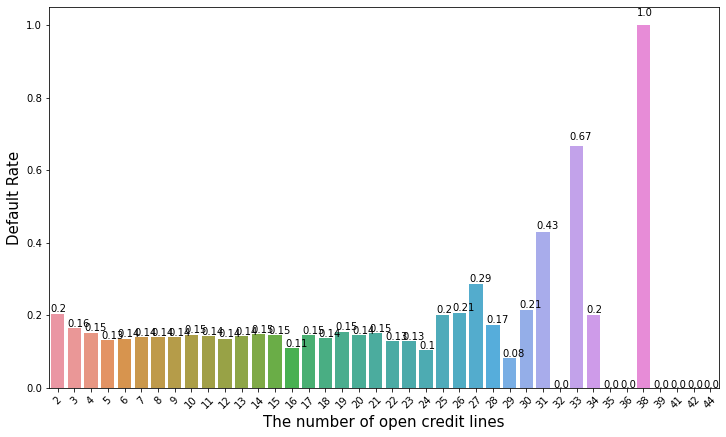

<Figure size 432x288 with 0 Axes>

In [36]:
# Analyzing Open_acc w.r.t Default Rate

plt.figure(figsize=(12,7))
rev=sns.barplot(data=loan,x=loan.open_acc,y=loan.loan_status, ci=None)
plt.xlabel("The number of open credit lines", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
plt.xticks(rotation = 45) 
for e in rev.patches:
    rev.annotate(str(round(e.get_height(),2)), (e.get_x() * 1.00, e.get_height() * 1.025))
plt.show()
plt.savefig("Univariate6.png")

* __From the above figure: We could see the Rate to default ususally higher for borrowers with more number of open credit lines.However, the trend isn't very strong__

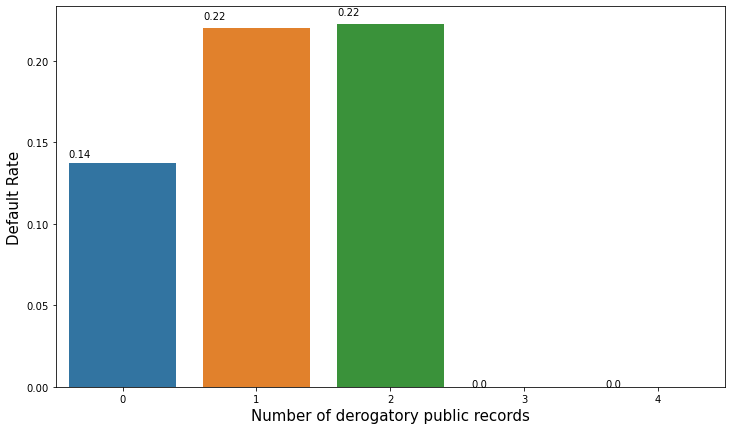

<Figure size 432x288 with 0 Axes>

In [37]:
# Analyzing derogatory public records w.r.t Default Rate

plt.figure(figsize=(12,7))
rev=sns.barplot(data=loan,x=loan.pub_rec,y=loan.loan_status, ci=None)
plt.xlabel("Number of derogatory public records", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
for e in rev.patches:
    rev.annotate(str(round(e.get_height(),2)), (e.get_x() * 1.002, e.get_height() * 1.025))
plt.show()
plt.savefig("Univariate7.png")

* __From the above figure:We could see the Rate to default ususally higher for borrowers with more number of public derogatory records.However, the trend isn't very strong__

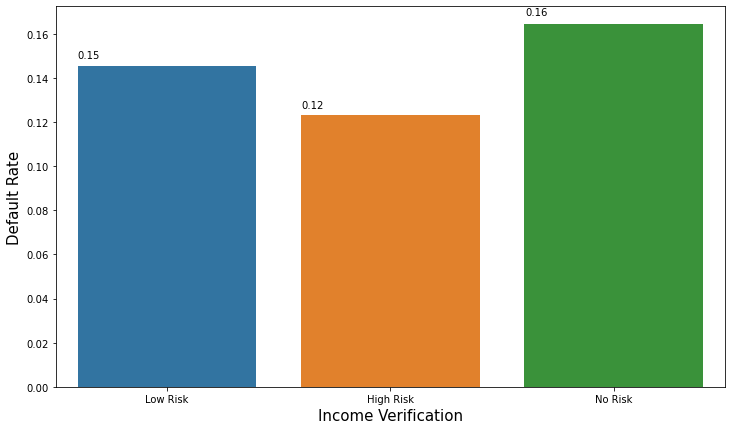

<Figure size 432x288 with 0 Axes>

In [38]:
# Analyzing Verification status w.r.t Default Rate

plt.figure(figsize=(12,7))
rev=sns.barplot(data=loan,x=loan.verification_status,y=loan.loan_status, ci=None)
plt.xlabel("Income Verification", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
for e in rev.patches:
    rev.annotate(str(round(e.get_height(),2)), (e.get_x() * 1.002, e.get_height() * 1.025))
plt.show()
plt.savefig("Univariate8.png")

* __From the above figure: We could say Verification Status information doens't yield a stronger relation for borrower's tendency to default.__

### We have performed Segmented Unvariate Analysis below using group by and aggregationg functions.

In [39]:

loanterm=loan.groupby(["term","loan_status"]).agg(loancount=("term","count"))
loanterm=loanterm.reset_index().sort_values(by="term",ascending=False)

loanyear=loan.groupby(["issued_y","loan_status"]).agg(loancount=("issued_y","count"))
loanyear=loanyear.reset_index().sort_values(by="issued_y",ascending=False)

loangrade=loan.groupby(["grade","loan_status"]).agg(loancount=("grade","count"))
loangrade=loangrade.reset_index().sort_values(by="grade",ascending=False)


loanhome=loan.groupby(["home_ownership","loan_status"]).agg(loancount=("home_ownership","count"))
loanhome=loanhome.reset_index().sort_values(by="home_ownership",ascending=False)


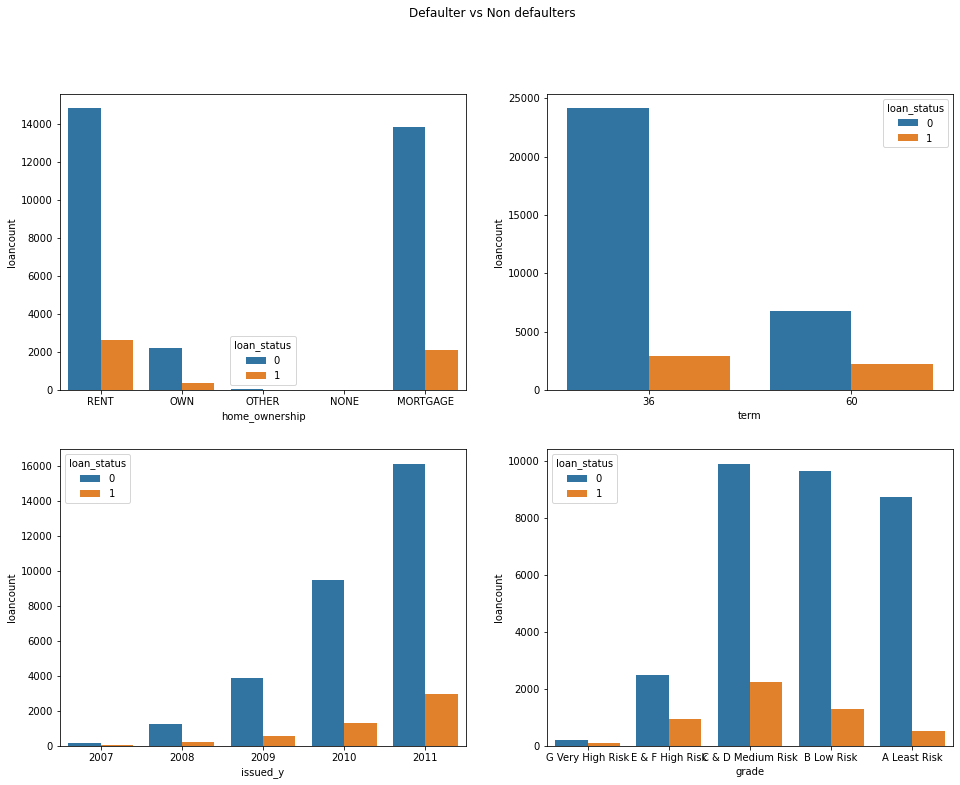

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Defaulter vs Non defaulters')

sns.barplot(ax=axes[0,0],data=loanhome,x=loanhome.home_ownership,y=loanhome.loancount,hue=loanhome.loan_status)

sns.barplot(ax=axes[0,1], data=loanterm,x=loanterm.term,y=loanterm.loancount,hue=loanterm.loan_status)

sns.barplot(ax=axes[1,0], data=loanyear,x=loanyear.issued_y,y=loanyear.loancount,hue=loanyear.loan_status)

sns.barplot(ax=axes[1,1], data=loangrade,x=loangrade.grade,y=loangrade.loancount,hue=loangrade.loan_status)

plt.savefig("SegUni")

plt.show()

* __Above charts display distribution of Defaulter and Non defaulters across valuable variables like - Home Ownership status, Term, Loan year and grade.__

## STEP 3 - Performing Bivariant Analysis & Multivariate Analysis

#### Bivariate analysis is a statistical method to analyze relationship among 2 data variables and revealing the correlation that exists where as MultiVariate Analysis help us to analyze more than 2 variables.

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36090 entries, 1 to 39716
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36090 non-null  int64         
 1   member_id             36090 non-null  int64         
 2   loan_amnt             36090 non-null  int64         
 3   funded_amnt           36090 non-null  int64         
 4   funded_amnt_inv       36090 non-null  float64       
 5   term                  36090 non-null  int32         
 6   int_rate              36090 non-null  float64       
 7   installment           36090 non-null  float64       
 8   grade                 36090 non-null  object        
 9   sub_grade             36090 non-null  object        
 10  emp_title             36090 non-null  object        
 11  emp_length            36090 non-null  int64         
 12  home_ownership        36090 non-null  object        
 13  annual_inc      

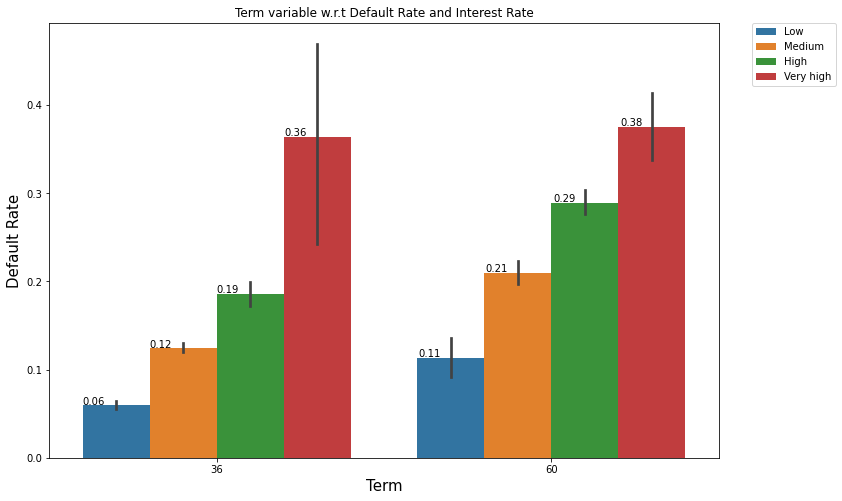

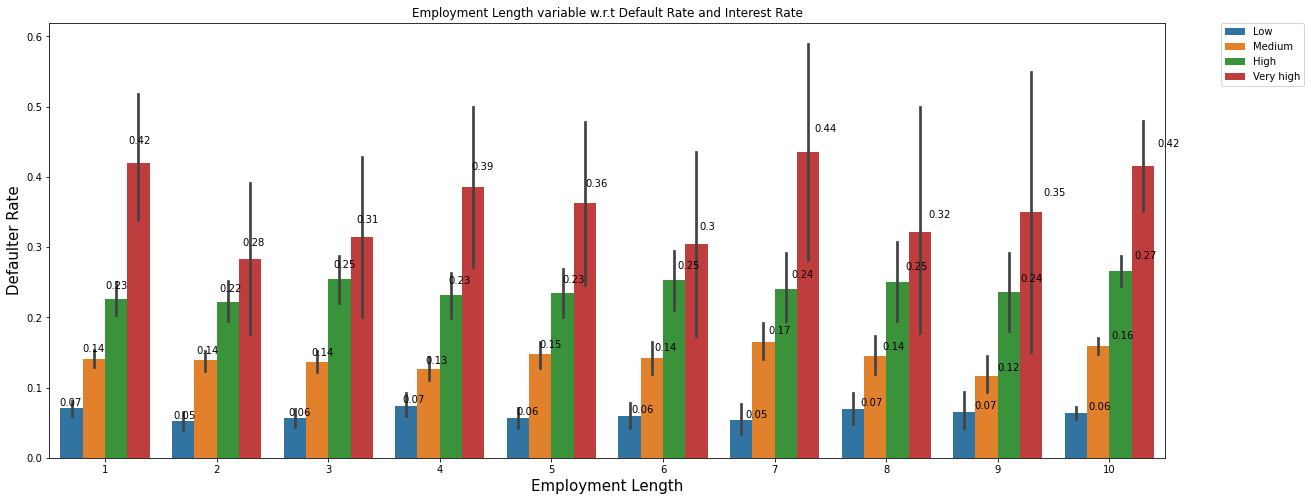

In [42]:
#Analyzing Term variable w.r.t Default Rate and Interest Rate.

plt.figure(figsize=(12,8))
c1=sns.barplot(x="term",y="loan_status", hue="reclass_int_rate",data=loan)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for c in c1.patches:
    c1.annotate(str(round(c.get_height(),2)), (c.get_x() * 1.005, c.get_height() * 1.005))
plt.xlabel("Term", fontsize=15)
plt.ylabel("Default Rate", fontsize=15)
plt.title("Term variable w.r.t Default Rate and Interest Rate")
plt.show()

#Analyzing Employment Length variable w.r.t Default Rate and Interest Rate.

plt.figure(figsize=(20,8))
c2=sns.barplot(x="emp_length",y="loan_status", hue="reclass_int_rate",data=loan)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for c in c2.patches:
    c2.annotate(str(round(c.get_height(),2)), (c.get_x() * 1.025, c.get_height() * 1.065))
plt.xlabel("Employment Length", fontsize=15)
plt.ylabel("Defaulter Rate", fontsize=15)
plt.title("Employment Length variable w.r.t Default Rate and Interest Rate")
plt.show()

* #### From above Figure 1: Analyzed Term w.r.t Default rate & Interest Rate and found out that tendency to Default increases with Higher Interest Rate for both the Terms - 30 Months and 60 months.

* #### From above Figure 2: Analyzed Employment w.r.t Default rate & Interest Rate and found out that tendency to Default increases with Higher Interest Rate across the Employment year length but highest with Employment Length -7 Years.


In [43]:

# Plotting Top 5 Loan purpose w. r. t Default Rate and Term.

top_purpose = pd.pivot_table(loan, index = ["term","purpose"],values= 'loan_status',aggfunc = "mean")

top_purpose=top_purpose.reset_index()
top_purpose=top_purpose.sort_values(['term','loan_status'] , ascending=False)
top_purpose

,term,purpose,loan_status
17,60,educational,0.428571
25,60,small_business,0.385343
19,60,house,0.297030
23,60,other,0.286350
26,60,vacation,0.285714
16,60,debt_consolidation,0.260055
24,60,renewable_energy,0.250000
15,60,credit_card,0.231964
21,60,medical,0.226027
22,60,moving,0.202247


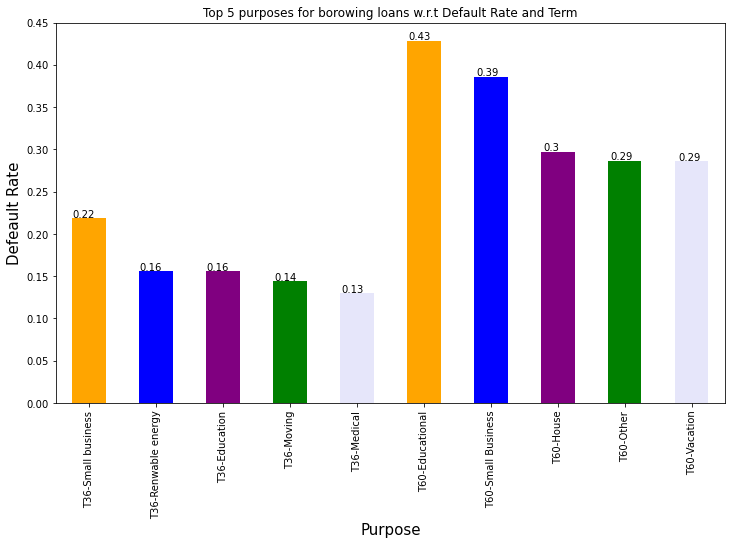

In [44]:
plt.figure(figsize=(12,7))

plot_1=top_purpose.groupby([top_purpose.term])['loan_status'].nlargest(5).plot.bar( color=['orange', 'blue', 'purple', 'green', 'lavender'])
for p in plot_1.patches:
    plot_1.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

tags=['T36-Small business','T36-Renwable energy','T36-Education','T36-Moving','T36-Medical','T60-Educational','T60-Small Business','T60-House','T60-Other','T60-Vacation']
plot_1.set_xticklabels(tags)
plt.title("Top 5 purposes for borowing loans w.r.t Default Rate and Term")
plt.xlabel("Purpose", fontsize=15)
plt.ylabel("Defeault Rate", fontsize=15)
plt.show()

* #### From the above plot: We can observe that Education Loans with Term 60 months have higher default rate.
* #### Loans for Small Business ,irresepctive of the term of loans, havee higher default rate.

In [45]:
# Plotting Top 5 Loan purpose w. r. t Default Rate and Emp Length.

top_purpose1 = pd.pivot_table(loan, index = ["emp_length","purpose"],values= 'loan_status',aggfunc = "mean")

top_purpose1=top_purpose1.reset_index()
top_purpose1=top_purpose1.sort_values(['emp_length','loan_status'] , ascending=False)
top_purpose1

,emp_length,purpose,loan_status
137,10,small_business,0.300000
131,10,house,0.214286
128,10,debt_consolidation,0.172711
135,10,other,0.168553
139,10,wedding,0.160377
136,10,renewable_energy,0.160000
133,10,medical,0.149068
138,10,vacation,0.138298
134,10,moving,0.115942
130,10,home_improvement,0.115802


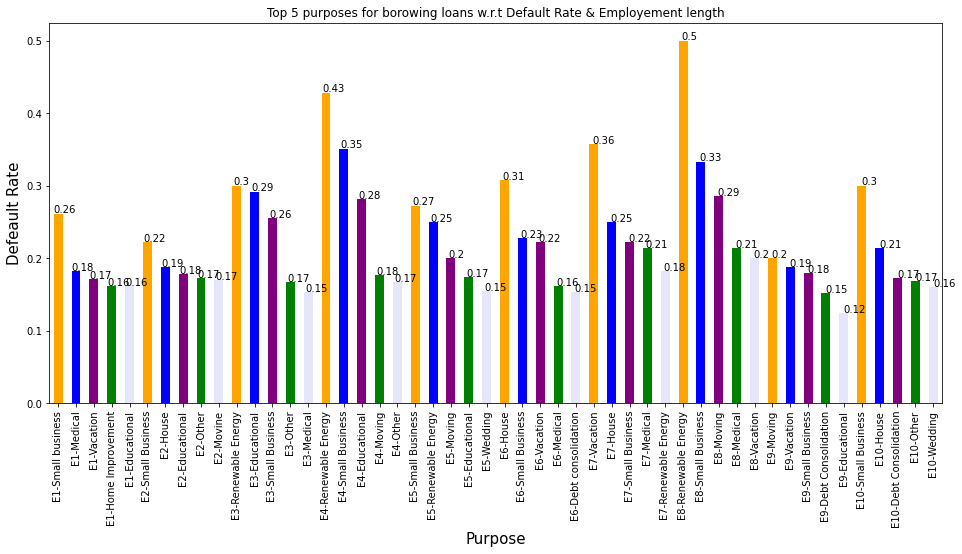

In [46]:
plt.figure(figsize=(16,7))

plot_2=top_purpose1.groupby([top_purpose1.emp_length])['loan_status'].nlargest(5).plot.bar( color=['orange', 'blue', 'purple', 'green', 'lavender'])
for p in plot_2.patches:
    plot_2.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

tags=['E1-Small business','E1-Medical','E1-Vacation','E1-Home Improvement','E1-Educational','E2-Small Business','E2-House','E2-Educational','E2-Other','E2-Movine','E3-Renewable Energy','E3-Educational','E3-Small Business','E3-Other','E3-Medical','E4-Renewable Energy','E4-Small Business','E4-Educational','E4-Moving','E4-Other','E5-Small Business','E5-Renewable Energy','E5-Moving','E5-Educational','E5-Wedding','E6-House','E6-Small Business','E6-Vacation','E6-Medical','E6-Debt consolidation','E7-Vacation','E7-House','E7-Small Business','E7-Medical','E7-Renewable Energy','E8-Renewable Energy','E8-Small Business','E8-Moving','E8-Medical','E8-Vacation','E9-Moving','E9-Vacation','E9-Small Business','E9-Debt Consolidation','E9-Educational','E10-Small Business','E10-House','E10-Debt Consolidation','E10-Other','E10-Wedding']
plot_2.set_xticklabels(tags)
plt.title("Top 5 purposes for borowing loans w.r.t Default Rate & Employement length")
plt.xlabel("Purpose", fontsize=15)
plt.ylabel("Defeault Rate", fontsize=15)
plt.show()

In [47]:
# Plotting Top 5 Loan purpose w. r. t Default Rate and Emp Length.

top_purpose_test = pd.pivot_table(loan, index = ["emp_length","purpose"],values= 'loan_status',aggfunc = "count")

top_purpose_test=top_purpose_test.reset_index()
top_purpose_test=top_purpose_test.sort_values(['emp_length','loan_status'] , ascending=False)
top_purpose_test

,emp_length,purpose,loan_status
128,10,debt_consolidation,3943
127,10,credit_card,1048
130,10,home_improvement,829
135,10,other,795
132,10,major_purchase,409
126,10,car,298
137,10,small_business,270
133,10,medical,161
139,10,wedding,106
138,10,vacation,94


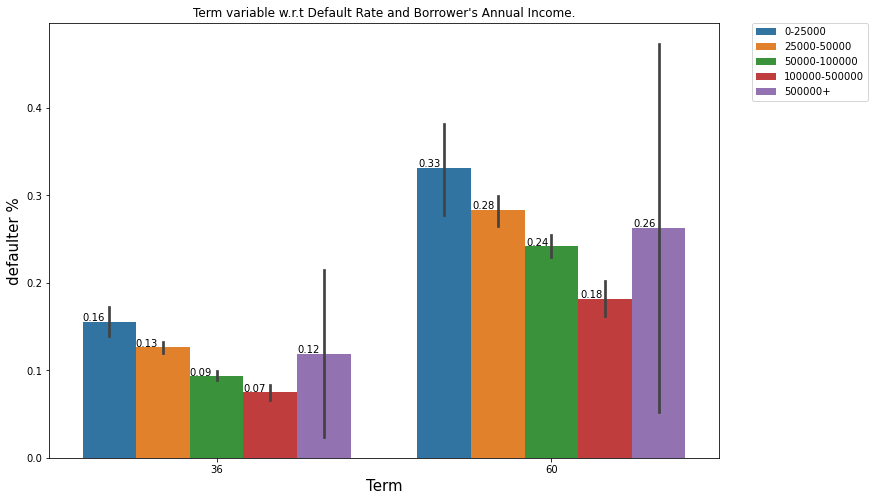

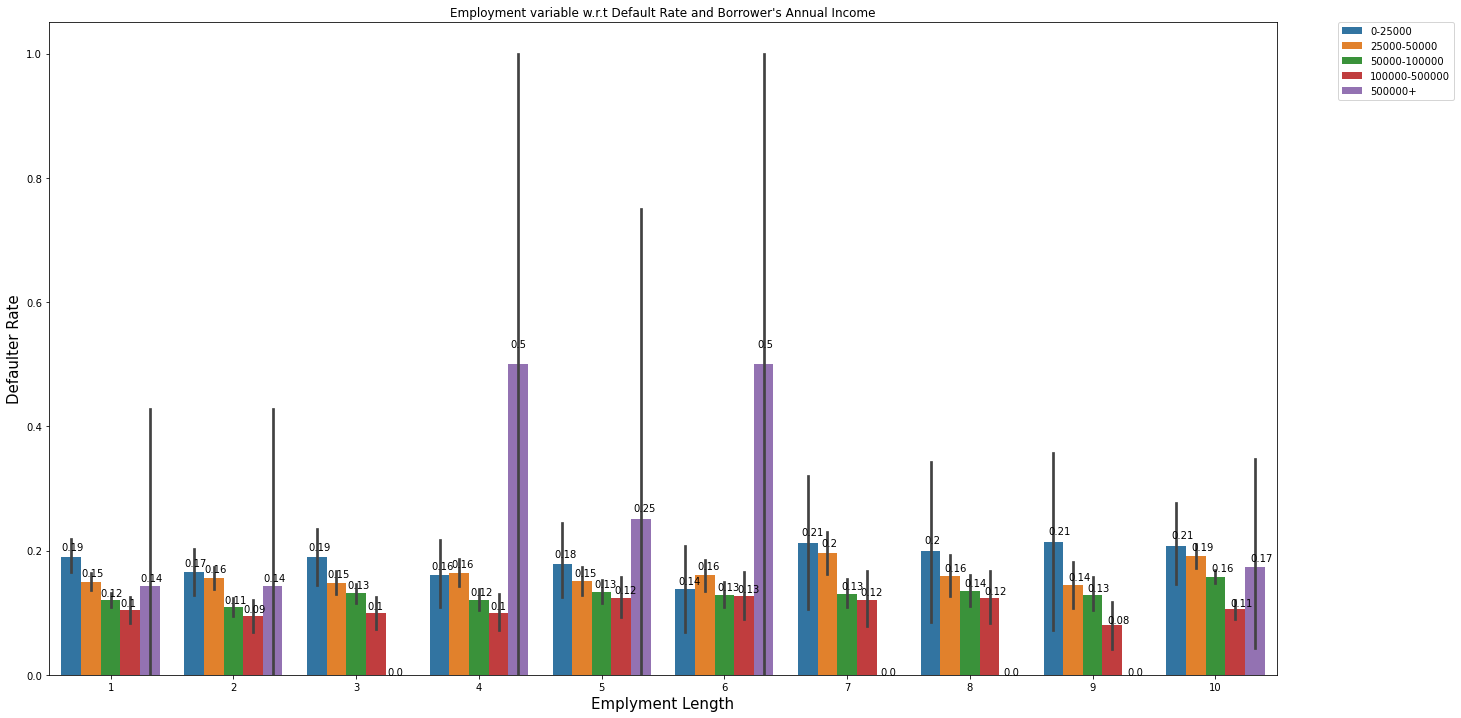

In [48]:

#Analyzing Term variable w.r.t Default Rate and Borrower's Annual Income.

plt.figure(figsize=(12,8))
c1=sns.barplot(x="term",y="loan_status", hue="reclass_annual_inc",data=loan)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for c in c1.patches:
    c1.annotate(str(round(c.get_height(),2)), (c.get_x() * 1.005, c.get_height() * 1.005))
plt.xlabel("Term", fontsize=15)
plt.ylabel("defaulter %", fontsize=15)
plt.title("Term variable w.r.t Default Rate and Borrower's Annual Income.")
plt.show()

#Analyzing Employment variable w.r.t Default Rate and Borrower's Annual Income.

plt.figure(figsize=(22,12))
c2=sns.barplot(x="emp_length",y="loan_status", hue="reclass_annual_inc",data=loan)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
for c in c2.patches:
    c2.annotate(str(round(c.get_height(),2)), (c.get_x() * 1.005, c.get_height() * 1.055))
plt.xlabel("Emplyment Length", fontsize=15)
plt.ylabel("Defaulter Rate", fontsize=15)
plt.title("Employment variable w.r.t Default Rate and Borrower's Annual Income")
plt.show()

* #### From above the Figure 1: Analyzed Term w.r.t Default rate & Annual Income and found out that the rate to Default is higher for borrowers having salary "around 25K or less "followed by borrowers having salary above 500K for both the terms -30 months and 60 months.

* #### From above the Figure 2: Analyzed Employment Length w.r.t Default rate & Interest Rate and found out that tendency to Default is higher for borrowers having Exmployment year length - 4 years or 7 years and salary above 500K.


<Figure size 2880x1080 with 0 Axes>

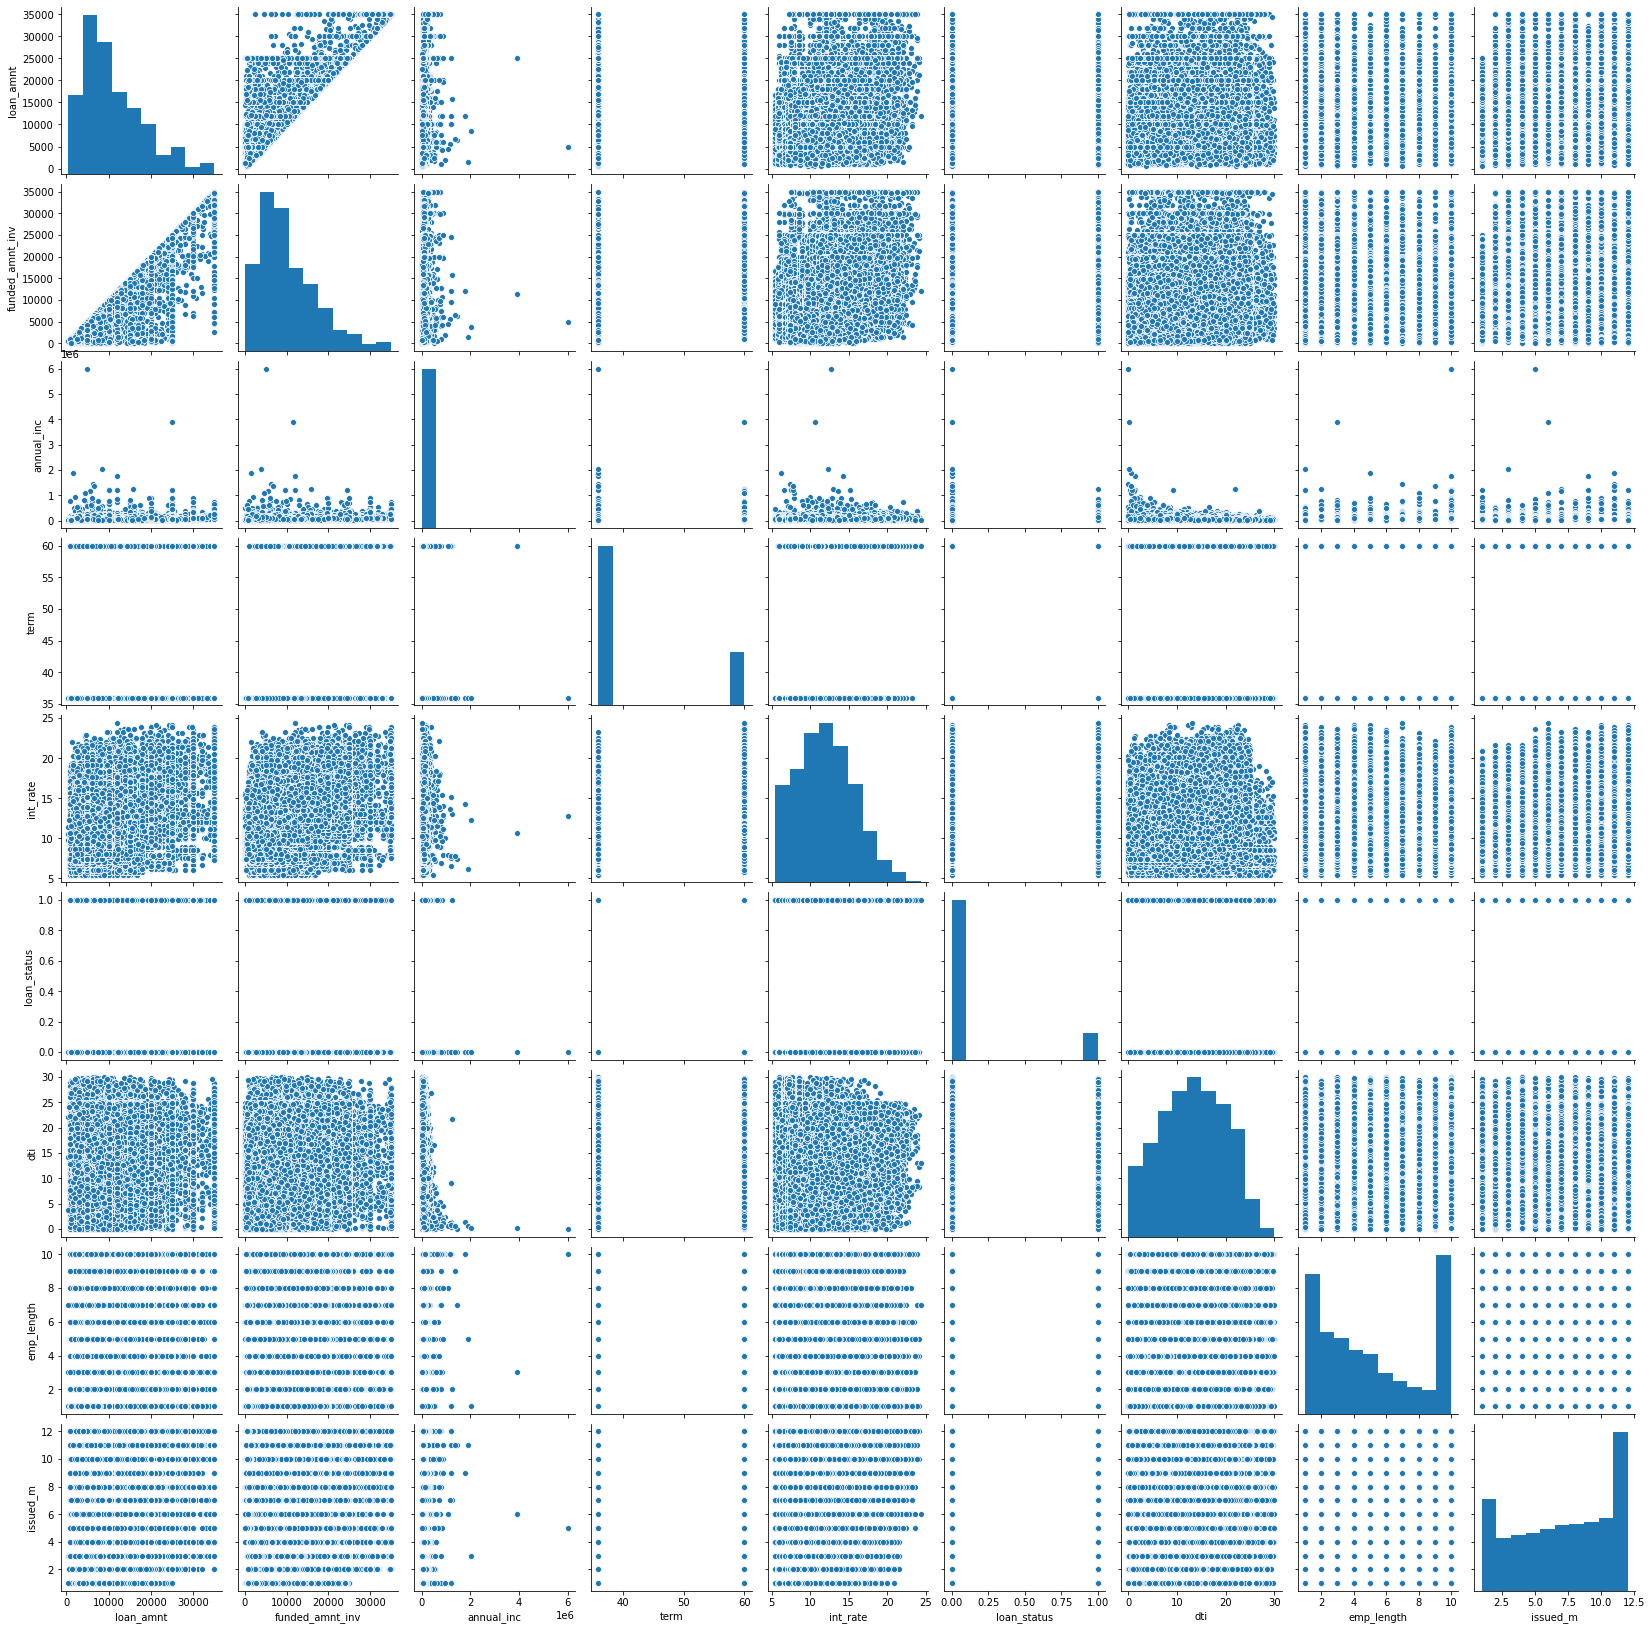

In [49]:
# Creating a Pair plot to identify distribution and trend of a variable w.r.t to other variables

plt.figure(figsize=(40,15))

sns.pairplot(loan[["loan_amnt","funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status","dti","emp_length","issued_m"]])

plt.show()

* #### From the above plot: We could not find any significant trend/ pattern except a mild trend between Annual Income and other variables - Loan Status,Interest Rate, DTI and Funded Loan amount.

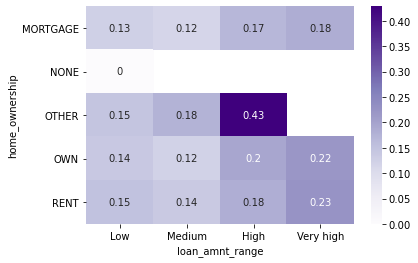

In [50]:
Homeown_table=pd.pivot_table(data=loan, index="home_ownership", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(Homeown_table,cmap = "Purples", annot=True)

* #### From the above plot: We could see a Higer Default Rate for Undefined/NONE status for Home ownership with High Loan amount.

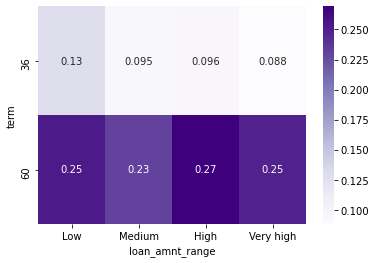

In [51]:
term_table=pd.pivot_table(data=loan, index="term", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(term_table,cmap = "Purples", annot=True)

* #### From the above plot: We could see a higher Default Rate of Loans with 60 months term across the Loan amount range.

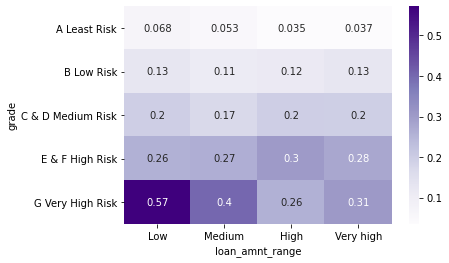

In [52]:
grade_table=pd.pivot_table(data=loan, index="grade", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(grade_table,cmap = "Purples", annot=True)

* #### From the above plot: We could see a higher Default Rate of Loans with G-Grade and Low Loan amount.

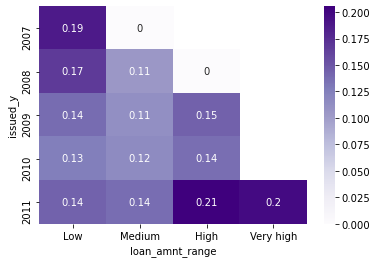

In [53]:
year_table=pd.pivot_table(data=loan, index="issued_y", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(year_table,cmap = "Purples", annot=True)

* #### From the above plot: We could see a higher Default Rate for Year 2011 followed by 2007.

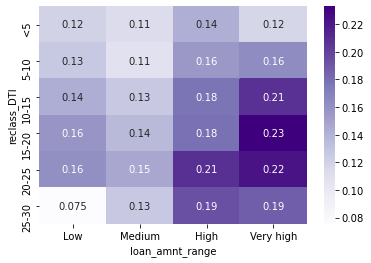

In [54]:
dti_table=pd.pivot_table(data=loan, index="reclass_DTI", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(dti_table,cmap = "Purples",annot=True)

* #### From the above plot: We could see a higher Default Rate for borowers with DTI range of 10 -25% DTI.

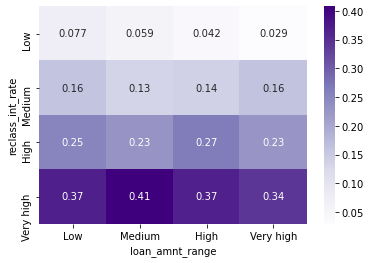

In [55]:
int_table=pd.pivot_table(data=loan, index="reclass_int_rate", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(int_table,cmap = "Purples",annot=True)

* #### From the above plot: We could see a higher Default Rate for Very High Interest Rate and Low & Medium Loan amount.

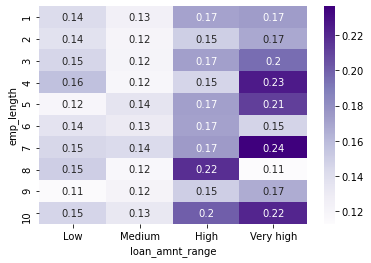

In [56]:
emp_table=pd.pivot_table(data=loan, index="emp_length", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(emp_table,cmap = "Purples", annot=True)

* #### From the above plot: We could see a higher Default Rate for borowers with 7years of Employment Length and Very High Loan amount.

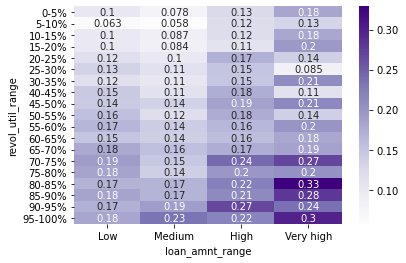

In [57]:
ru_table=pd.pivot_table(data=loan, index="revol_util_range", columns="loan_amnt_range", values="loan_status",aggfunc="mean")
sns.heatmap(ru_table,cmap = "Purples",annot=True)

* #### From above Figure: We Clearly see the Default rate for Revolving line utilization rate greater for 80% & higher

In [58]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'acc_now_delinq', 'tax_liens', 'issued_y', 'issued_m',
       'issued_s', 'loan_amnt_range', 'reclass_annual_inc',
       'reclass_annual_inc_1', 'reclass_int_rate', 'reclass_DTI',
       'revol_util_range'],
      dtype='object')

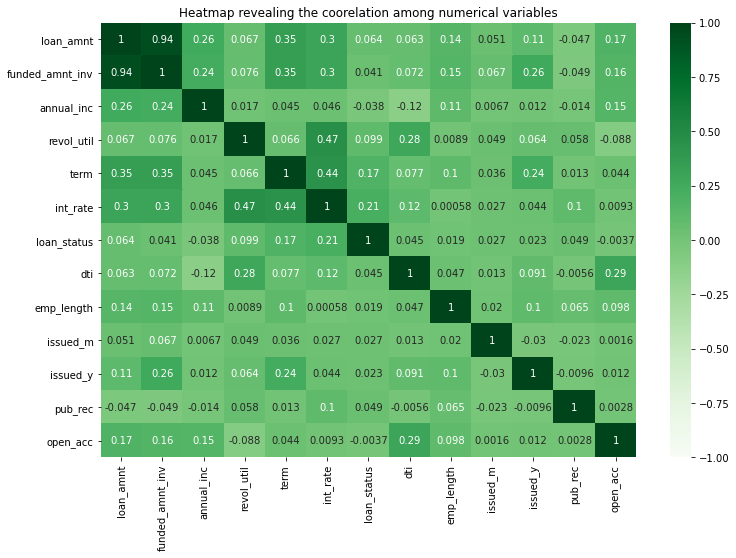

In [59]:
plt.figure(figsize=(12,8))

imp_var = ["loan_amnt","funded_amnt_inv", "annual_inc","revol_util", "term", "int_rate", "loan_status","dti",
           "emp_length","issued_m","issued_y","pub_rec","open_acc"]
var_corr = loan[imp_var].corr()
sns.heatmap(var_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="Greens")
plt.title("Heatmap revealing the coorelation among numerical variables")
plt.savefig("Heatmap")
plt.show()

In [60]:
# User defined function to identify Important indicators for "Defaulting"

def defaultrate_difference(df,fval):
    t=pd.pivot_table(data=loan,values="loan_status", index=fval,aggfunc='mean')
    t=t.reset_index().sort_values(by ="loan_status", ascending=True)
    DR_Diff=t.loan_status.max()-t.loan_status.min()
    return t, DR_Diff

#### Th higher the difference between the Defaullt Rate between minimum and maximum values, the better is the indicator.

In [61]:
pred_1,defrate_1=defaultrate_difference(loan,"loan_amnt_range")
print(pred_1,"\n",defrate_1)

  loan_amnt_range  loan_status
1          Medium     0.127049
0             Low     0.141634
2            High     0.177688
3       Very high     0.198206 
 0.07115773736825123


In [62]:
pred_2,defrate_2=defaultrate_difference(loan,"reclass_DTI")
print(pred_2,"\n",defrate_2)

  reclass_DTI  loan_status
0          <5     0.119260
1        5-10     0.122326
5       25-30     0.135652
2       10-15     0.142637
3       15-20     0.153467
4       20-25     0.164691 
 0.045430738941056745


In [63]:
pred_3,defrate_3=defaultrate_difference(loan,"reclass_int_rate")
print(pred_3,"\n",defrate_3)

  reclass_int_rate  loan_status
0              Low     0.063055
1           Medium     0.143888
2             High     0.242914
3        Very high     0.373973 
 0.3109174624706204


In [64]:
pred_4,defrate_4=defaultrate_difference(loan,"reclass_annual_inc")
print(pred_4,"\n",defrate_4)

  reclass_annual_inc  loan_status
3      100000-500000     0.106358
2       50000-100000     0.133593
1        25000-50000     0.161031
4            500000+     0.163934
0            0-25000     0.182033 
 0.07567540233372524


In [65]:
pred_5,defrate_5=defaultrate_difference(loan,"grade")
print(pred_5,"\n",defrate_5)

               grade  loan_status
0       A Least Risk     0.056533
1         B Low Risk     0.118287
2  C & D Medium Risk     0.184710
3    E & F High Risk     0.278279
4   G Very High Risk     0.332168 
 0.2756353043870576


In [66]:
pred_6,defrate_6=defaultrate_difference(loan,"emp_length")
print(pred_6,"\n",defrate_6)

   emp_length  loan_status
8           9     0.126984
1           2     0.130841
3           4     0.136545
2           3     0.137028
0           1     0.137941
5           6     0.140267
4           5     0.140914
7           8     0.141829
6           7     0.153012
9          10     0.155610 
 0.028625928196743644


In [67]:
pred_7,defrate_7=defaultrate_difference(loan,"term")
print(pred_7,"\n",defrate_7)

   term  loan_status
0    36     0.106602
1    60     0.247447 
 0.14084454284815945


In [68]:
pred_8,defrate_8=defaultrate_difference(loan,"issued_y")
print(pred_8,"\n",defrate_8)

   issued_y  loan_status
3      2010     0.122481
2      2009     0.124464
4      2011     0.155085
1      2008     0.155556
0      2007     0.185022 
 0.06254097633003568


In [69]:
pred_8,defrate_8=defaultrate_difference(loan,"sub_grade")
print(pred_8,"\n",defrate_8)

   sub_grade  loan_status
0         A1     0.022682
1         A2     0.046310
2         A3     0.050360
3         A4     0.059174
4         A5     0.077045
5         B1     0.089372
6         B2     0.106952
7         B3     0.118431
8         B4     0.128216
9         B5     0.136766
10        C1     0.156282
11        C2     0.160656
13        C4     0.169761
15        D1     0.171038
14        C5     0.174677
12        C3     0.175302
16        D2     0.204789
22        E3     0.223361
17        D3     0.224880
18        D4     0.231386
33        G4     0.240741
19        D5     0.241997
21        E2     0.266436
20        E1     0.268956
24        E5     0.274788
25        F1     0.288136
27        F3     0.288344
23        E4     0.292079
26        F2     0.292237
30        G1     0.307692
28        F4     0.345324
34        G5     0.346154
31        G2     0.364865
32        G3     0.439024
29        F5     0.465347 
 0.44266408889409653


__From the above heatman and defaultrate_difference function: We can see decent correlation between__
- Interest rate & loan Status
- Term & loan Status
- revol_util & loan Status
- annual_inc & loan status
- fund_ammt_invest & loan status
- DTI & loan status

### Observations:

* #### Avoid providing loans to Borrowers with Revolving line utilization rate greater than 80%.
* #### If some one seeks loan for "Small Businesses, Others, Debit Consolidation" we can increase interst rate or have do proper background check as we see more defaulters in this area. 
* #### Avoid providing loans for Very High Loan value to those who have Employment length of 7years.
* #### Avoid providing loans for Very High Interest Rate for 0 - 15K.
* #### Avoid providing loans for where the loan amount is in range of 15k -25k whose Home owner ship is None 


### Important Indictors for Loan Defaulting by Borrowers:
#### From the above Univariate Analysis (Distribution plots and Bar plots), Bivariate Analysis and Multivariate Analysis(Correlation Heatmaps, bar plots, pair plots and pivot tables) and by calculating the difference of maximum and minimum Default Rate for each variable, we could derive the below important variables which would play a crucial role in Loan Default Analysis :

* TERM
* INTEREST RATE
* GRADE / SUBGRADE
* DTI
* ANNUAL INCOME
* FUNDED LOAN AMOUNT
* REVOLVING UTILIZATION
